<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/nse_metal_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [137]:
# Define a custom date parser function
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')  # Adjust the format as needed


In [138]:
data= pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/refs/heads/master/work/portfolio/metal_pe.csv", parse_dates=['Date'],date_parser=date_parser)

In [139]:
data.set_index('Date',inplace=True)

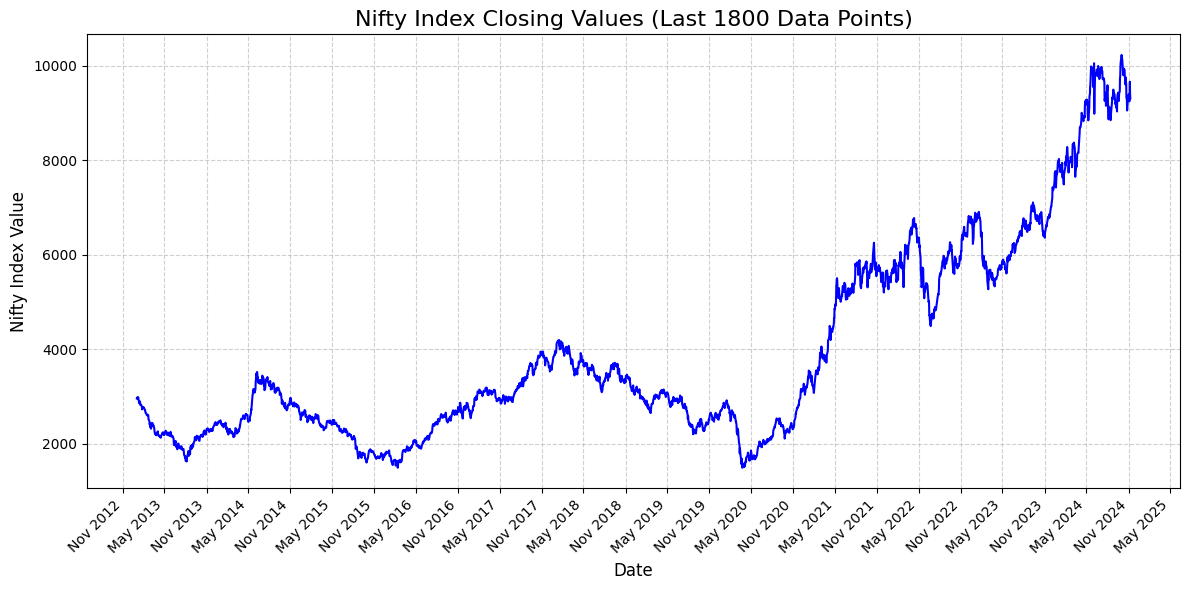

In [140]:
# Plot 'Close' values with improved visibility settings
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
plt.plot(data['Close'], color='b', linewidth=1.5)  # Thicker line and color for clarity
plt.title('Nifty Index Closing Values (Last 1800 Data Points)', fontsize=16)  # Descriptive title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nifty Index Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid with light dashed lines for readability

# Set x-axis major locator to show every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45, ha='right')

# Tight layout to ensure labels fit well
plt.tight_layout()

# Display the plot
plt.show()


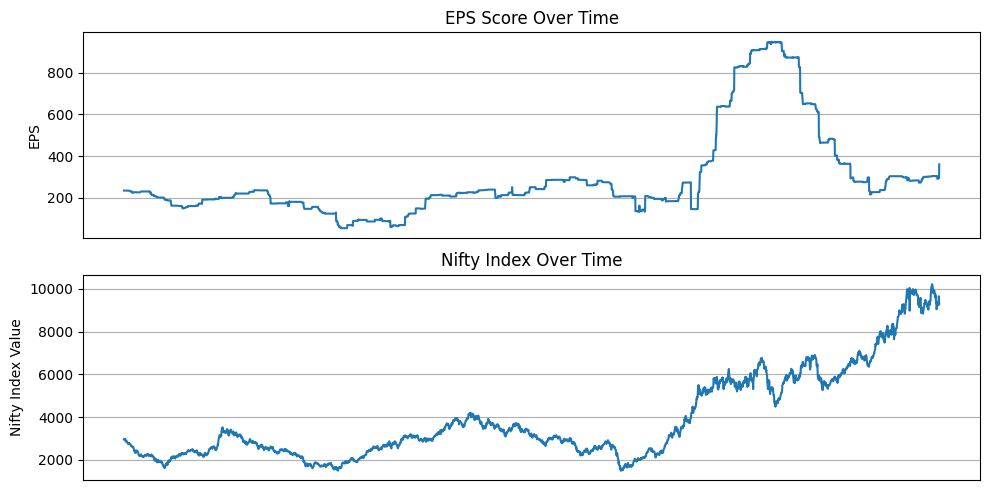

In [141]:
# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)

# Plot PE Percentile Score
ax1.plot(data['Close']/data['P/E'])
#ax1.plot((data['Close']/data['feat_PE']).rolling(window=50).mean())
ax1.set_title('EPS Score Over Time')
ax1.set_ylabel('EPS')
ax1.grid(True)


# Plot Nifty Index
ax2.plot(data['Close'])
ax2.set_title('Nifty Index Over Time')
ax2.set_ylabel('Nifty Index Value')
ax2.grid(True)

# Remove x-axis ticks and labels
ax1.xaxis.set_major_locator(plt.NullLocator())
ax1.xaxis.set_minor_locator(plt.NullLocator())
ax2.xaxis.set_major_locator(plt.NullLocator())
ax2.xaxis.set_minor_locator(plt.NullLocator())

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [142]:
#data=data.tail(750)

In [143]:
#data.set_index('Date',inplace=True)
data['mov50']= data['P/E'].rolling(window=18).mean()

In [144]:
data.tail(2)

,IndexName,P/E,P/B,Div Yield %,Open,High,Low,Close,mov50
Date,,,,,,,,,
2024-11-07,NIFTY METAL,31.93,2.69,2.25,9646.25,9657.75,9355.90,9392.85,31.588333
2024-11-08,NIFTY METAL,25.85,2.67,2.27,9432.40,9473.80,9262.35,9308.90,31.241667


In [145]:
#data[['feat_Div_Yield','feat_PB','feat_PE','Open','High','Low','Close']].to_csv('data_fundamental.csv')

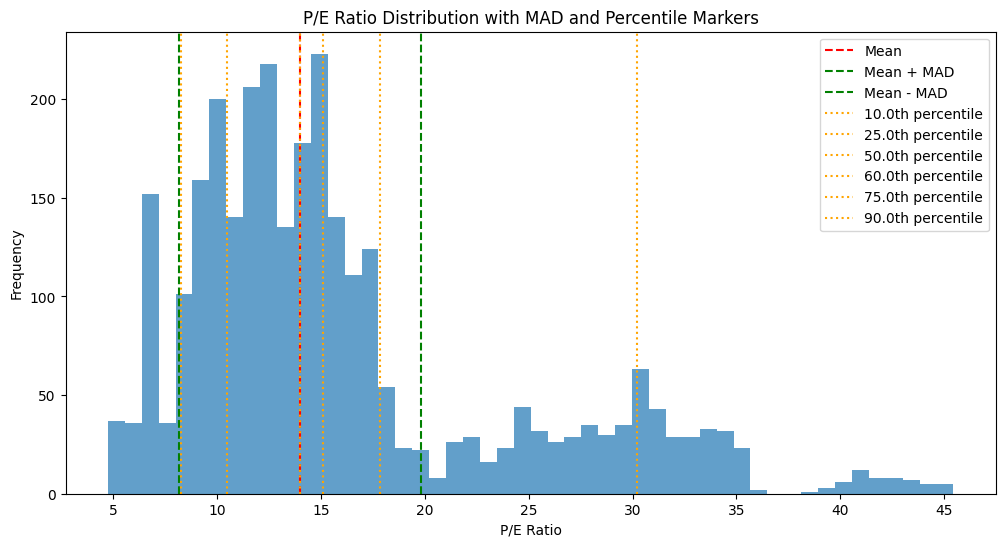

Mean P/E: 13.99
MAD: 5.84
Percentiles:
0.10     8.256
0.25    10.490
0.50    13.990
0.60    15.120
0.75    17.840
0.90    30.200
Name: P/E, dtype: float64

Current P/E: 25.85
MAD Score: 2.03 MADs from mean
Percentile Score: 84.13th percentile


In [146]:
# Assume 'pe_ratios' is your time series of P/E ratios
pe_ratios = data['P/E']

# Calculate mean and MAD
mean_pe = pe_ratios.median()
mad_pe = (pe_ratios - mean_pe).abs().mean()

# Calculate percentiles
percentiles = pe_ratios.quantile([0.1, 0.25, 0.5,0.6,0.75, 0.9])
data['percentile']=percentiles
# Plot
plt.figure(figsize=(12, 6))
plt.hist(pe_ratios, bins=50, alpha=0.7)
plt.axvline(mean_pe, color='r', linestyle='dashed', label='Mean')
plt.axvline(mean_pe + mad_pe, color='g', linestyle='dashed', label='Mean + MAD')
plt.axvline(mean_pe - mad_pe, color='g', linestyle='dashed', label='Mean - MAD')

for p, v in percentiles.items():
    plt.axvline(v, color='orange', linestyle=':', label=f'{p*100}th percentile')

plt.title('P/E Ratio Distribution with MAD and Percentile Markers')
plt.xlabel('P/E Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Mean P/E: {mean_pe:.2f}")
print(f"MAD: {mad_pe:.2f}")
print("Percentiles:")
print(percentiles)

# Evaluate current P/E
current_pe = data['P/E'].iloc[-1]  # Example current P/E
mad_score = (current_pe - mean_pe) / mad_pe
percentile_score = sum(pe_ratios < current_pe) / len(pe_ratios) * 100

print(f"\nCurrent P/E: {current_pe}")
print(f"MAD Score: {mad_score:.2f} MADs from mean")
print(f"Percentile Score: {percentile_score:.2f}th percentile")

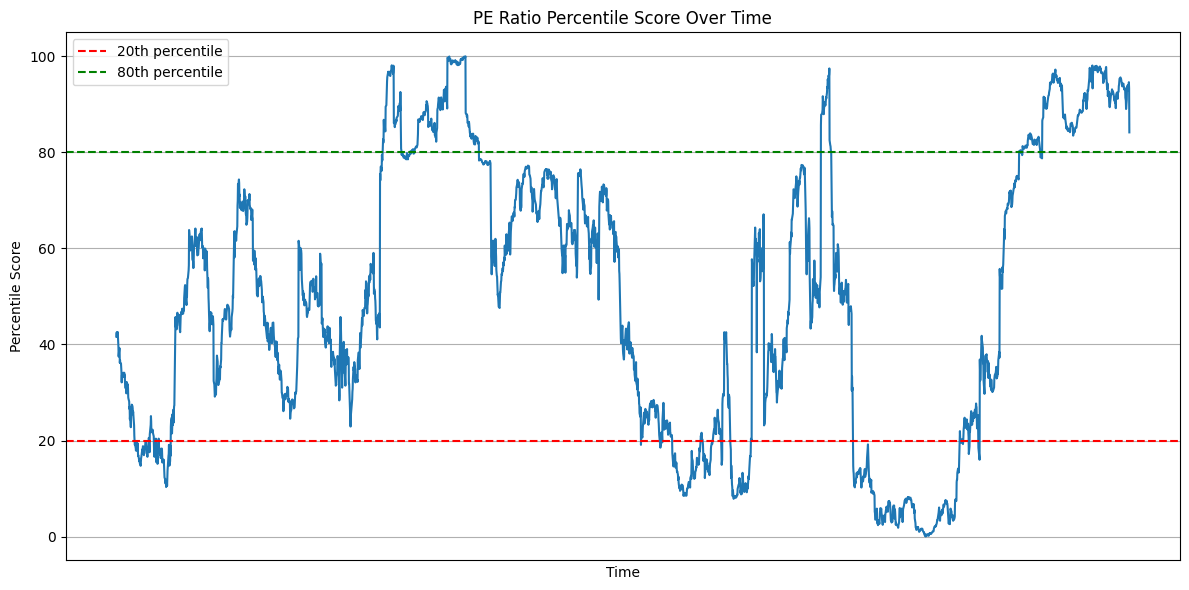

In [147]:
from scipy import stats

# Assuming you have a DataFrame 'df' with 'date' and 'pe' columns
# If not, you can create a sample DataFrame like this:
# df = pd.DataFrame({
#     'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
#     'pe': np.random.uniform(10, 30, 100)
# })

# Calculate percentile scores
data['pe_percentile'] = stats.percentileofscore(data['P/E'], data['P/E'], kind='weak')


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data['pe_percentile'])
plt.title('PE Ratio Percentile Score Over Time')
plt.xlabel('Time')  # You can remove this line if you don't want any x-axis label
plt.ylabel('Percentile Score')
plt.grid(True)

# Remove x-axis ticks and labels
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_minor_locator(plt.NullLocator())

# Add horizontal lines at 20th and 80th percentiles
plt.axhline(y=20, color='r', linestyle='--', label='20th percentile')
plt.axhline(y=80, color='g', linestyle='--', label='80th percentile')

plt.legend()
plt.tight_layout()
plt.show()

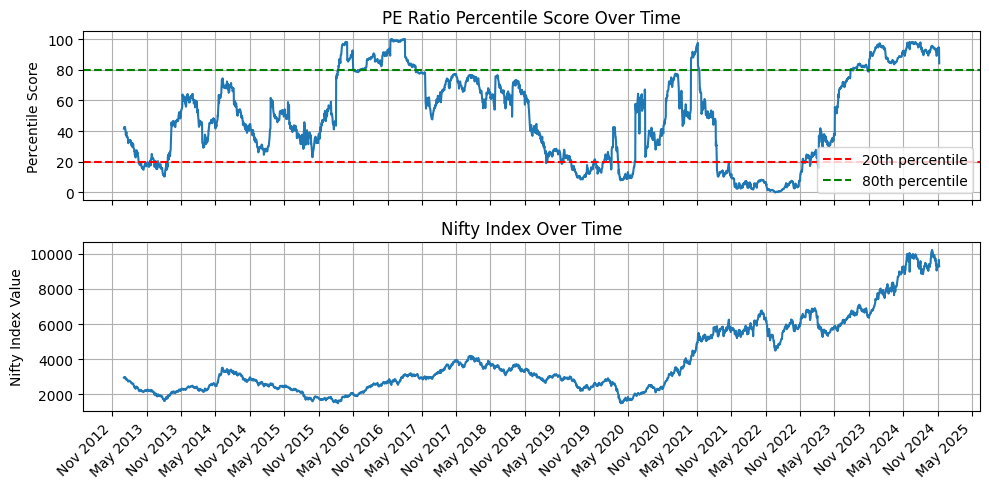

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns: 'pe_percentile' and 'nifty'
# If it's not, you might need to prepare your data accordingly

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)

# Plot PE Percentile Score
ax1.plot(data['pe_percentile'])
ax1.set_title('PE Ratio Percentile Score Over Time')
ax1.set_ylabel('Percentile Score')
ax1.grid(True)
ax1.axhline(y=20, color='r', linestyle='--', label='20th percentile')
ax1.axhline(y=80, color='g', linestyle='--', label='80th percentile')
ax1.legend()

# Plot Nifty Index
ax2.plot(data['Close'])
ax2.set_title('Nifty Index Over Time')
ax2.set_ylabel('Nifty Index Value')
ax2.grid(True)

# Remove x-axis ticks and labels

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()